# Hypothesis Testing

In this project we will explore the principles and processes involved in hypothesis testing using the case study given below
.
<br/>
#### Case Study: ####
You work for an environmental think tank called Repair Our Air (ROA). ROA is formulating policy recommendations to improve the air quality in America, using the Environmental Protection Agency's Air Quality Index (AQI) to guide their decision making. An AQI value close to 0 signals "little to no" public health concern, while higher values are associated with increased risk to public health.

They've tasked you with leveraging AQI data to help them prioritize their strategy for improving air quality in America
<br/>

**The purpose** is to leverage AQI data to help them prioritize their strategy for improving air quality in America

**The goal** is to construct a hypothesis test for the company ROA , using our results of that test to make recommendations in the following:

1. ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.
2. With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?
3. A new policy will affect those states with a mean AQI of 10 or greater. Will Michigan be affected by this new policy?
<br/>


*This project has 4 parts:*

**Part 1:** Imports and Data loading

**Part 2:** Data Exploration and  Cleaning


**Part 3:** Statistical Tests

**Part 4:** Results and Evaluation

<br/>




## Step 1: Imports

To proceed with our analysis, import `pandas` and `numpy`. To conduct our hypothesis testing, import `stats` from `scipy`. To carry out visualizations, import `pyplot` and `seaborn`.

#### Import Packages

In [103]:
# Import relevant packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


#### Load Dataset

In [81]:
aqi_df = pd.read_csv(r'C:\Users\Ghost\Desktop\project_files\epa_air_quality\c4_epa_air_quality.csv')

## Step 2: Data Exploration and Cleaning

#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `shape`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where you can always refer back to if needed.

In [82]:
aqi_df.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [83]:
aqi_df.shape

(260, 10)

Generate summary statistics using the `describe()` method.

In [87]:
aqi_df.describe()

,Unnamed: 0,arithmetic_mean,aqi
count,260.000000,260.000000,260.000000
mean,129.500000,0.403169,6.757692
std,75.199734,0.317902,7.061707
min,0.000000,0.000000,0.000000
25%,64.750000,0.200000,2.000000
50%,129.500000,0.276315,5.000000
75%,194.250000,0.516009,9.000000
max,259.000000,1.921053,50.000000


And summary information using the `info()` method.

In [88]:
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        260 non-null    int64  
 1   date_local        260 non-null    object 
 2   state_name        260 non-null    object 
 3   county_name       260 non-null    object 
 4   city_name         260 non-null    object 
 5   local_site_name   257 non-null    object 
 6   parameter_name    260 non-null    object 
 7   units_of_measure  260 non-null    object 
 8   arithmetic_mean   260 non-null    float64
 9   aqi               260 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 20.4+ KB


 Remove irrelevant columns, check for missing data, duplicates and outliers and handle them accordingly


The `Unnamed: 0` column is not relevant to our analysis so remove it using the `drop()` method

In [89]:
# drop Unnamed: 0 column
aqi_df = aqi_df.drop('Unnamed: 0', axis = 1)
aqi_df.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


Check for number of duplicates using the `duplicated()` method

In [90]:
# check for duplicates
aqi_df.duplicated().sum()

0

Check for missing values using the `isna()` method

In [91]:
aqi_df.isna().sum()

date_local          0
state_name          0
county_name         0
city_name           0
local_site_name     3
parameter_name      0
units_of_measure    0
arithmetic_mean     0
aqi                 0
dtype: int64

Only local_site_name column has missing values, totalling 3 rows.
local_site_name is not relevant to this project, but we will remove missing rows regardless, since they are few

Drop the missing rows using the `dropna()` method

In [93]:
# drop missing values
aqi_df = aqi_df.dropna(axis = 0)

#confirm it worked
aqi_df.isna().sum()

date_local          0
state_name          0
county_name         0
city_name           0
local_site_name     0
parameter_name      0
units_of_measure    0
arithmetic_mean     0
aqi                 0
dtype: int64

Check for outliers using box plots

Only our `aqi` column is relevant to our hypothesis test so we will only be creating a single plot

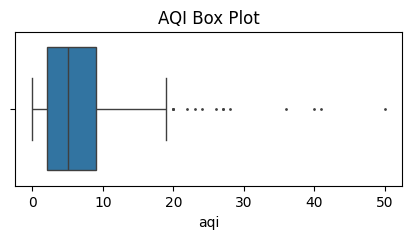

In [94]:
# plot boxplot

plt.figure(figsize = (5,2))
sns.boxplot(x = aqi_df['aqi'], fliersize = 1)
plt.title('AQI Box Plot')
plt.xlabel('aqi')
plt.show()

The box plot indicates a number of outliers in our variable

we'll use the `IQR` to isolate the aqi in our data and further probe the data

In [95]:
# first calculate IQR 
Q1 = aqi_df['aqi'].quantile(0.25)
Q3 = aqi_df['aqi'].quantile(0.75)
IQR = Q3 - Q1

# use IQR to calculate the upper and lower limits
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR 

# display all ouliers in our dataset using our limits
mask = (aqi_df['aqi'] < lower_limit) | (aqi_df['aqi'] > upper_limit)

outliers = len(aqi_df[mask])
print(f"Total number of outliers: {outliers}")
print()
aqi_df[mask]

Total number of outliers: 14



,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
25,2018-01-01,Nevada,Clark,Las Vegas,Sunrise Acres,Carbon monoxide,Parts per million,1.805263,41
46,2018-01-01,California,Riverside,Mira Loma,Mira Loma (Van Buren),Carbon monoxide,Parts per million,1.231579,27
69,2018-01-01,Arizona,Maricopa,Phoenix,JLG SUPERSITE,Carbon monoxide,Parts per million,0.978947,20
75,2018-01-01,California,San Joaquin,Stockton,Stockton-Hazelton,Carbon monoxide,Parts per million,1.084211,20
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
131,2018-01-01,Arizona,Maricopa,Phoenix,CENTRAL PHOENIX,Carbon monoxide,Parts per million,1.110526,27
132,2018-01-01,California,Los Angeles,Compton,Compton,Carbon monoxide,Parts per million,1.742105,40
155,2018-01-01,Arizona,Maricopa,Phoenix,SOUTH PHOENIX,Carbon monoxide,Parts per million,1.394737,36
177,2018-01-01,California,Los Angeles,Long Beach,Long Beach (Hudson),Carbon monoxide,Parts per million,1.200000,24
189,2018-01-01,California,Los Angeles,Pomona,Pomona,Carbon monoxide,Parts per million,1.000000,20


Our aqi variable has a total of 14 outliers. This is not abnormal considering a good Air Quality Index(aqi) can range from a value of 0 to 50. However, any aqi value above 100 is considered unhealthy to sensitive groups. 

Now that we have confirmed our outliers are not abnormal for the data we are working with, we do not need to remove them or reassign their values, we can proceed with our hypothesis test.


## Step 3. Statistical Tests

Before we proceed, recall the following steps for conducting hypothesis testing:

1. Formulate the null hypothesis and the alternative hypothesis.<br>
2. Set the significance level.<br>
3. Determine the appropriate test procedure.<br>
4. Compute the p-value.<br>
5. Draw your conclusion.

### Hypothesis 1: ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.

Before proceeding with our analysis, it will be helpful to subset the data for our comparison.

In [105]:
# Create dataframes for each sample being compared in your test

# California excluding Los Angeles Subset
cali_state = aqi_df[(aqi_df['state_name']=='California') & (aqi_df['county_name']!='Los Angeles')]

# Los Angeles Subset
LA_county = aqi_df[aqi_df['county_name'] == 'Los Angeles']

print(cali_state['aqi'].mean())
print(LA_county['aqi'].mean())

11.0
16.285714285714285


#### Formulate hypothesis:

**Formulate null and alternative hypotheses:**

*   $H_0$: There is no difference in the mean AQI between Los Angeles County and the rest of California.
*   $H_A$: There is a difference in the mean AQI between Los Angeles County and the rest of California.


#### Set the significance level:

In [107]:
# For this analysis, the significance level is 5%
SL = 5 / 100
print(f'Significance Level: {SL}')

Significance Level: 0.05


#### Determine the appropriate test procedure:

Here, we are comparing the sample means between two independent samples. Therefore, we will utilize a **two-sample  𝑡-test**.

#### Compute the P-value

In [99]:
# Compute p-value 
stats.ttest_ind(a = LA_county['aqi'], b = cali_state['aqi'], equal_var = False)

TtestResult(statistic=2.1107010796372014, pvalue=0.049839056842410995, df=17.08246830361151)

#### **Question 1. What is your P-value for hypothesis 1, and what does this indicate for your null hypothesis?**

- From our test we obtained a p value of 0.049 which is less than our significance level of 0.05
- Since our p value is less than our significance level, we reject the null hypothesis, and therefore conclude that there is a statistically significant difference in the mean AQI between Los Angeles County and the rest of California

### Hypothesis 2: With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?

Before proceeding with our analysis, it will be helpful to subset the data for our comparison.

In [100]:
# Create dataframes for each sample being compared in our test

New_York = aqi_df[aqi_df['state_name'] == 'New York']
Ohio = aqi_df[aqi_df['state_name'] == 'Ohio']

print(Ohio['aqi'].mean())
print(New_York['aqi'].mean())


3.3333333333333335
2.5


#### Formulate hypothesis:

**Formulate null and alternative hypotheses:**

*   $H_0$: The mean AQI of New York is greater than or equal to that of Ohio.
*   $H_A$: The mean AQI of New York is **below** that of Ohio.


#### Significance Level (remains at 5%)

#### Determine the appropriate test procedure:

Here, we are comparing the sample means between two independent samples in one direction. Therefore, we will utilize a **two-sample  𝑡-test**.

#### Compute the P-value

In [101]:
# Compute p-value here

stats.ttest_ind(a = New_York['aqi'], b = Ohio['aqi'], alternative = 'less', equal_var = False)

TtestResult(statistic=-2.025951038880333, pvalue=0.030446502691934683, df=15.036745051598716)

#### **Question 2. What is your P-value for hypothesis 2, and what does this indicate for your null hypothesis?**

- From our test we obtained a p value of 0.03 which is less than our significance level of 0.05
- Since our p value is less than our significance level, we reject the null hypothesis, and therefore conclude that at a 5% significance level the mean aqi of New York is below that of Ohio

###  Hypothesis 3: A new policy will affect those states with a mean AQI of 10 or greater. Will Michigan be affected by this new policy?

Before proceeding with our analysis, it will be helpful to subset the data for our comparison.

In [109]:
# Create dataframes for sample

Michigan = aqi_df[aqi_df['state_name'] == 'Michigan']
Michigan['aqi'].mean()

8.11111111111111

#### Formulate hypothesis:

**Formulate null and alternative hypotheses:**

*   $H_0$: The mean AQI of Michigan is less than 10.
*   $H_A$: The mean AQI of Michigan is greater than or equal to 10.


#### Significance Level (remains at 5%)

#### Determine the appropriate test procedure:

Here, we are comparing one sample mean relative to a particular value in one direction. Therefore, we will utilize a **one-sample  𝑡-test**. 

#### Compute the P-value

In [111]:
# Compute your p-value here

stats.ttest_1samp(Michigan['aqi'], 10)

TtestResult(statistic=-1.7395913343286131, pvalue=0.12011896137197813, df=8)

#### **Question 3. What is your P-value for hypothesis 3, and what does this indicate for your null hypothesis?**

- From our test we obtained a p value of 0.12 which is greater than our significance level of 0.05
- Since our p value is greater than our significance level, we fail to reject the null hypothesis, and therefore conclude that the mean AQI of Michigan is less than 10
- We can therefore say, with a 5% significance level that michigan will not be affected by the new policy

## Step 4. Results and Evaluation

Now that we have completed our statistical tests, we can consider our hypotheses and the results we gathered.

#### **Question 4. Did our results show that the AQI in Los Angeles County was statistically different from the rest of California?**

Yes, using a significance level of 5%, our results show that there is a statistically significant difference in the AQI in Los Angeles County and the rest of California

#### **Question 5. Did New York or Ohio have a lower AQI?**

Yes, at a 5% significance level, we rejected the null hypothesis and could not conclude that the mean AQI of New York is greater than or equal to that of Ohio, therefore it is likely that the mean AQI of New York is below that of Ohio.

#### **Question 6: Will Michigan be affected by the new policy impacting states with a mean AQI of 10 or greater?**



At a 5% significance level, we failed to reject the null hypothesis and could not conclude that Michigan had a mean AQI equal to or greater than 10, therefore it is likely that Michigan will not be affected by the new policy